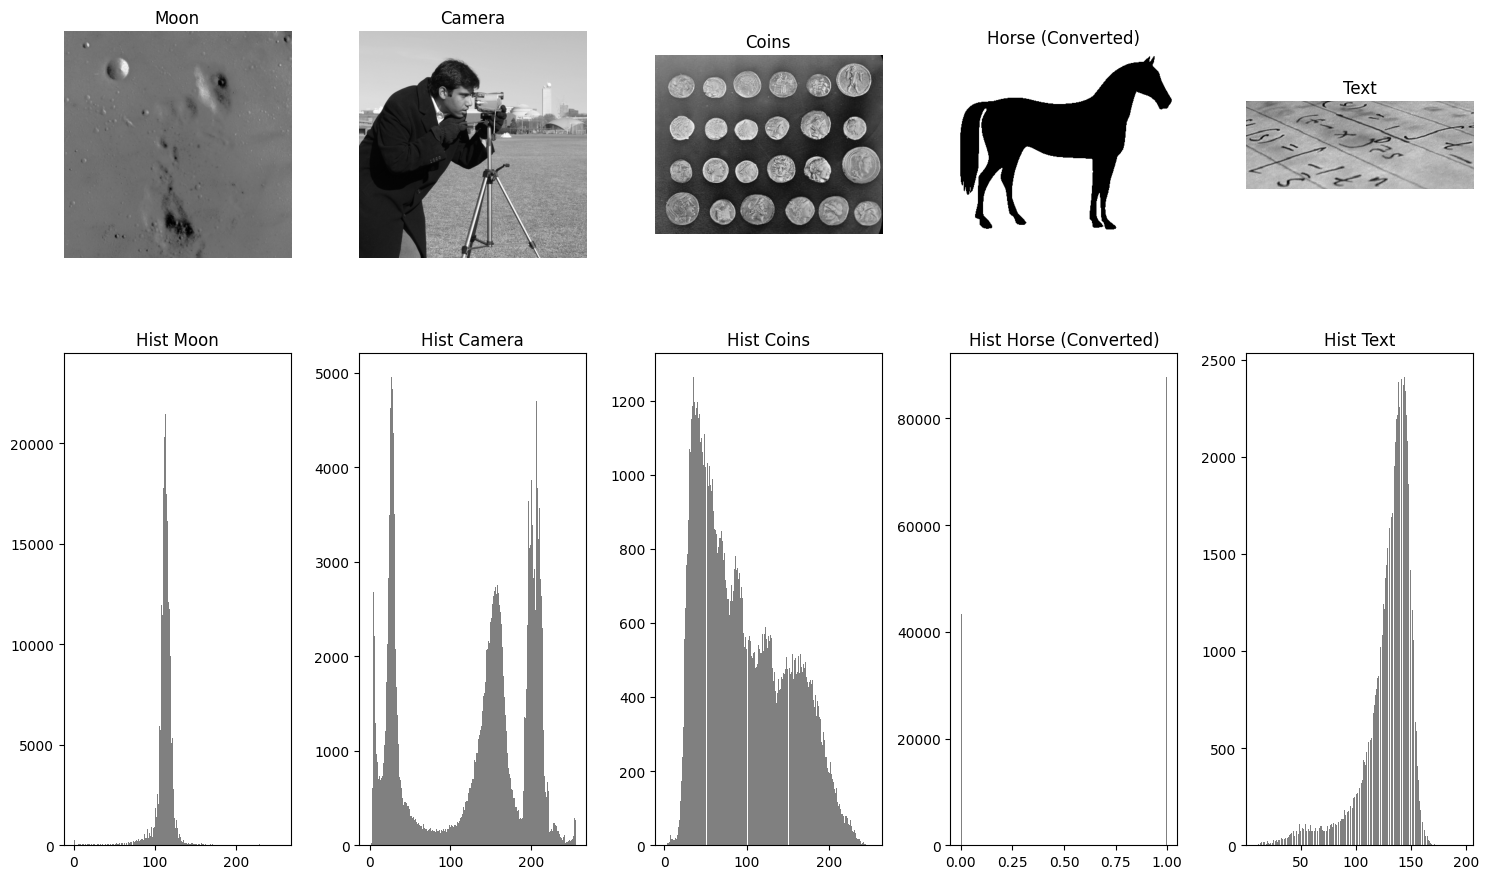

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# 1. Pilih 5 citra dan pastikan semuanya dalam format numerik (bukan bool)
img1 = data.moon()
img2 = data.camera()
img3 = data.coins()
# Tambahkan .astype(np.uint8) khusus untuk horse atau amankan semua citra
img4 = data.horse().astype(np.uint8) 
img5 = data.text()

images = [img1, img2, img3, img4, img5]
titles = ['Moon', 'Camera', 'Coins', 'Horse (Converted)', 'Text']

# 2. Visualisasi Diagnosa
plt.figure(figsize=(15, 10))
for i in range(5):
    # Tampilkan Gambar
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
    
    # Tampilkan Histogram
    plt.subplot(2, 5, i+6)
    # Gunakan .ravel() seperti sebelumnya
    plt.hist(images[i].ravel(), bins=256, color='gray')
    plt.title(f"Hist {titles[i]}")

plt.tight_layout()
plt.show()


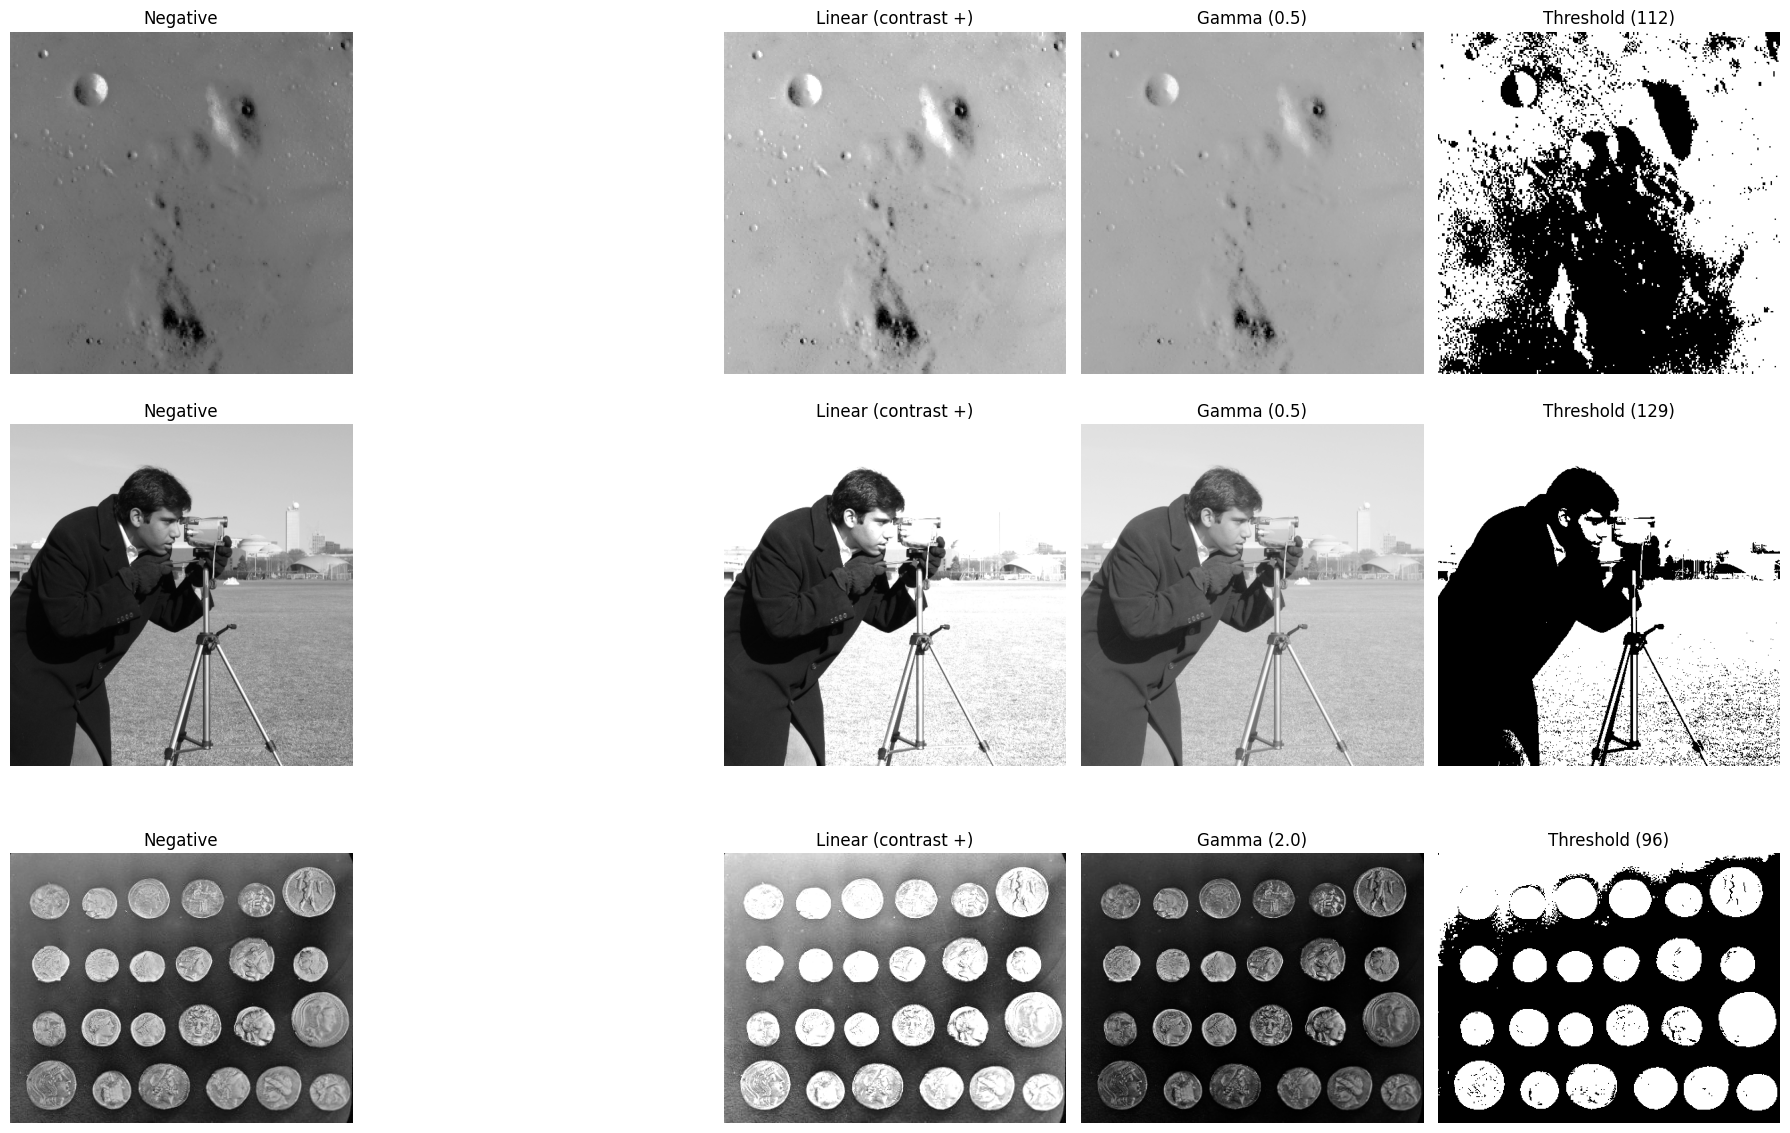

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

def trans_negatif(img):
    return 255 - img 

def trans_linear(img, a, b):
    res = a * img.astype(np.float32) + b 
    return np.clip(res, 0, 255).astype(np.uint8)

def trans_gamma(img, gamma):
    invGamma = gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(img, table)

def trans_threshold(img, thresh):
    res = np.zeros_like(img)
    res[img >= thresh] = 255
    return res 


patients = [data.moon(), data.camera(), data.coins()]
p_names = ['Moon', 'Camera', 'Coins']

plt.figure(figsize=(18, 12))

for i in range(3):
    img = patients[i]
    
    plt.subplot(3, 5, i*5 + 1)
    plt.imshow(img, cmap='gray')
    plt.title("Negative")
    plt.axis('off')
    
    # apply linear (naikin kontras a = 1.5, dan b = 20)
    plt.subplot(3, 5, i * 5 + 3)
    plt.imshow(trans_linear(img, 1.5, 20), cmap='gray')
    plt.title("Linear (contrast +)")
    plt.axis('off')
    
    # 3. apply gamma (moon dan camera gamma = 0.5 mencerahkan, coins: gamma = 2 mendinginkan)
    g_val = 0.5 if i < 2 else 2.0
    
    plt.subplot(3, 5, i*5 + 4)
    plt.imshow(trans_gamma(img, g_val), cmap='gray')
    plt.title(f"Gamma ({g_val})")
    plt.axis('off')
    
    # 4. apply thresholding (ambil rata rata sebagai threshold)
    t_val = np.mean(img)
    plt.subplot(3, 5, i*5 + 5)
    plt.imshow(trans_threshold(img, t_val), cmap='gray')
    plt.title(f"Threshold ({int(t_val)})")
    plt.axis('off')

plt.tight_layout()
plt.show()

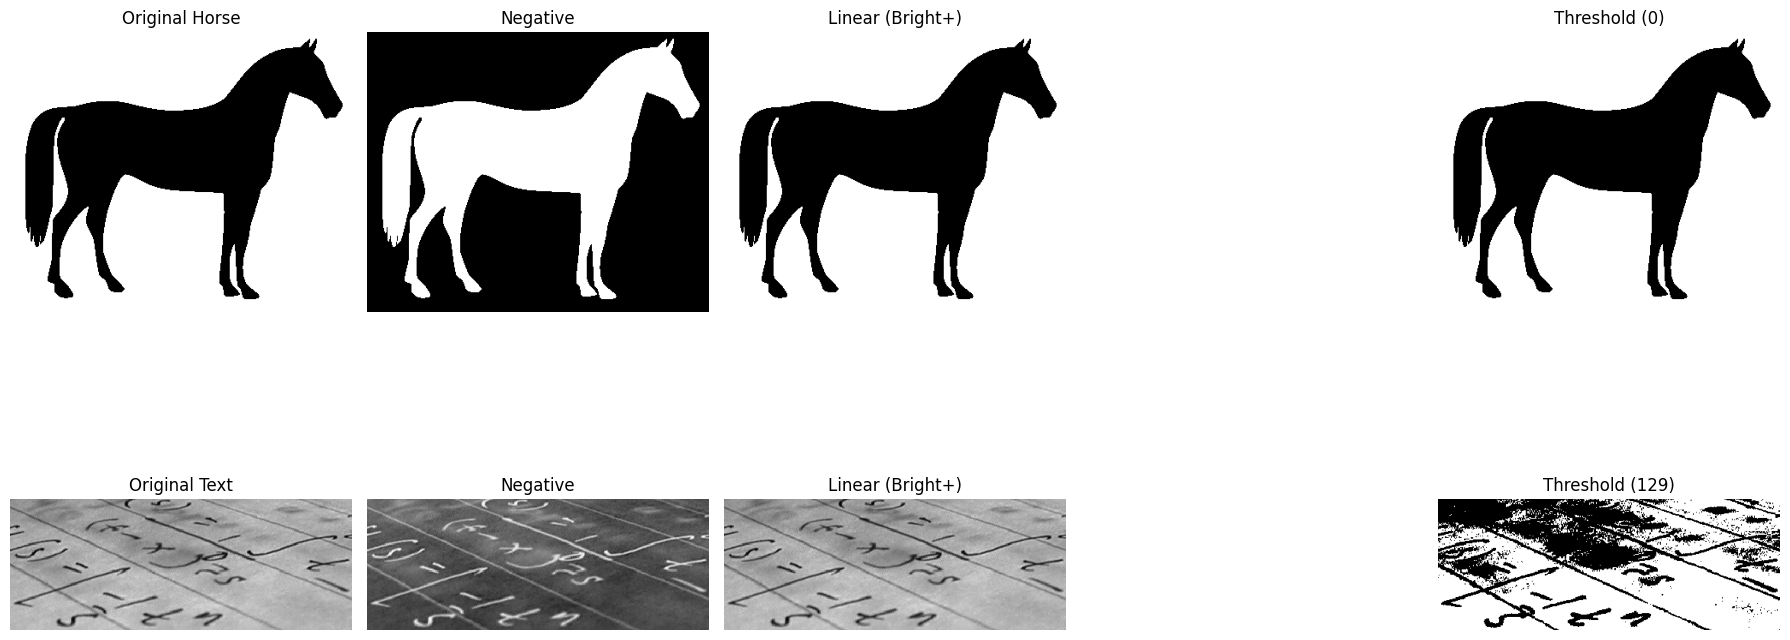

In [4]:
# --- EKSEKUSI PADA PASIEN 4 & 5 ---

# Load Pasien
patients_final = [data.horse(), data.text()]
pf_names = ['Horse', 'Text']

plt.figure(figsize=(18, 8))

for i in range(2):
    img = patients_final[i]
    
    # 1. Original
    plt.subplot(2, 5, i*5 + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Original {pf_names[i]}")
    plt.axis('off')

    # 2. Negative (Sangat berguna untuk Horse)
    plt.subplot(2, 5, i*5 + 2)
    plt.imshow(trans_negatif(img), cmap='gray')
    plt.title("Negative")
    plt.axis('off')

    # 3. Linear (Brightness+)
    plt.subplot(2, 5, i*5 + 3)
    plt.imshow(trans_linear(img, 1.0, 50), cmap='gray')
    plt.title("Linear (Bright+)")
    plt.axis('off')



    # 5. Thresholding (Kritikal untuk Text)
    t_val = np.mean(img)
    plt.subplot(2, 5, i*5 + 5)
    plt.imshow(trans_threshold(img, t_val), cmap='gray')
    plt.title(f"Threshold ({int(t_val)})")
    plt.axis('off')

plt.tight_layout()
plt.show()

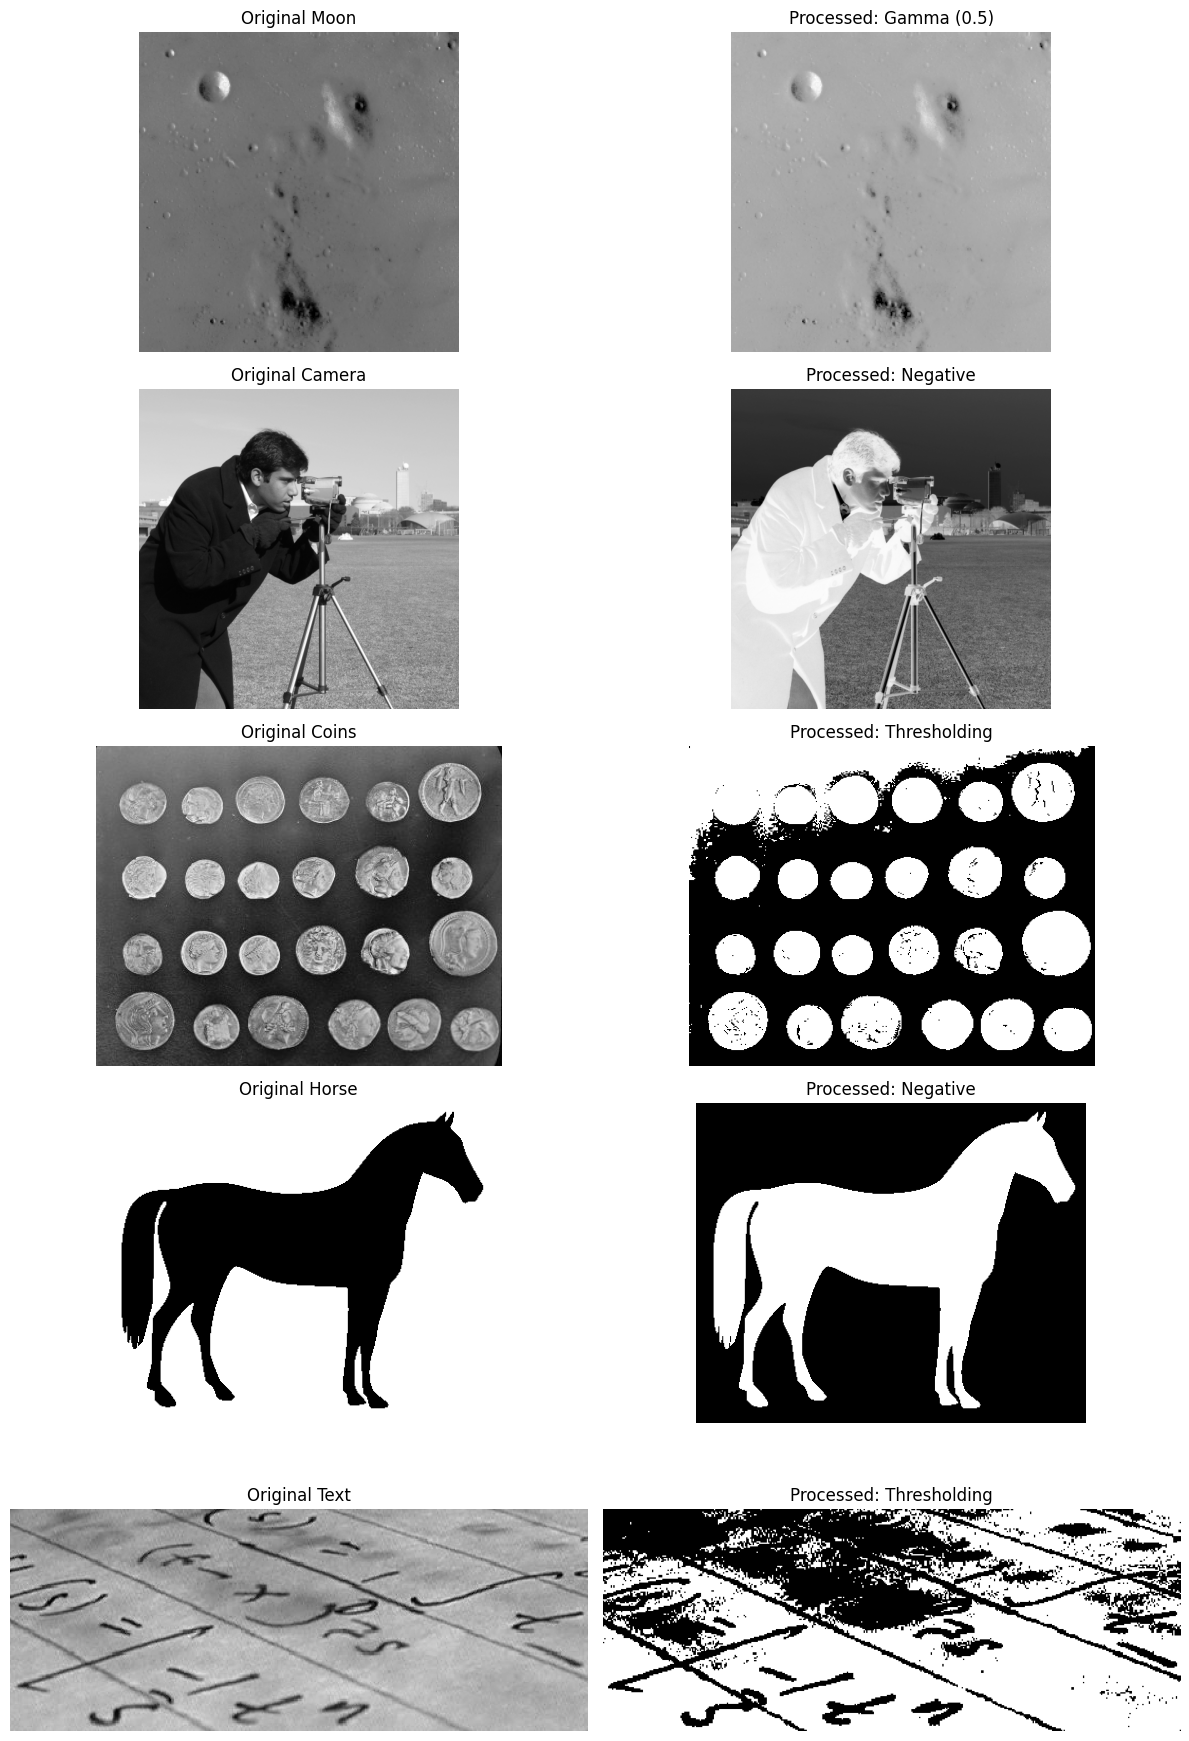

In [ ]:
# --- FINAL SUMMARY EXPORT ---
plt.figure(figsize=(12, 18))

# Daftar "Resep" Terbaik untuk setiap Pasien
# Kita pilih pengobatan yang paling efektif berdasarkan eksperimen sebelumnya
best_treatments = [
    (images[0], trans_gamma(images[0], 0.5), 'Moon', 'Gamma (0.5)'),
    (images[1], trans_negatif(images[1]), 'Camera', 'Negative'),
    (images[2], trans_threshold(images[2], np.mean(images[2])), 'Coins', 'Thresholding'),
    (images[3], trans_negatif(images[3]), 'Horse', 'Negative'),
    (images[4], trans_threshold(images[4], np.mean(images[4])), 'Text', 'Thresholding')
]

for i, (orig, proc, name, tech) in enumerate(best_treatments):
    # Kolom 1: Citra Asli
    plt.subplot(5, 2, i*2 + 1)
    plt.imshow(orig, cmap='gray')
    plt.title(f"Original {name}")
    plt.axis('off')
    
    # Kolom 2: Citra Hasil Pengobatan
    plt.subplot(5, 2, i*2 + 2)
    plt.imshow(proc, cmap='gray')
    plt.title(f"Processed: {tech}")
    plt.axis('off')

plt.tight_layout()
plt.savefig('Final_Comparison_Tugas2.png', dpi=300) # Simpan untuk laporan
plt.show()